# Santa 2023 - The Polytope Permutation Puzzle
## Simple improvement by finfing shortest path by using networkX

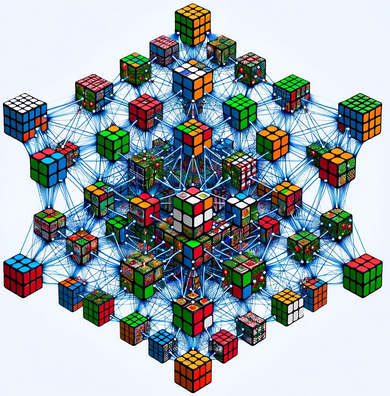

Hello everyone, in this notebook, I try to improve the given sample_submission by using graph network theory.
The idea is 

1. Create graph network of one puzzle type, which node represent state of puzzle and edge represent move of puzzle.
2. Find the shortest path btw. initial state and target state.
3. Do step 1 and 2 for all puzzle type, except "cube_33/33/33" because of limitation of memory & run time of notebook.

Idially it is better to create graph with all possible state of puzzle but it is too large to do in notebook.
So base data here is limitted to sample_submission as study.

Please feel free to give me your feedback or advice in comment field.
I appreciate if you like this and click upvote :)

# Import libraries, set configuration & load data

In [1]:
import sys, warnings, time, os, copy, gc, re, random, json
warnings.filterwarnings('ignore')
import pickle as pkl
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
sns.set()
from pprint import pprint
from pathlib import Path
from tqdm import tqdm
tqdm.pandas()
import networkx as nx

In [2]:
DEBUG = False

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/santa-2023/sample_submission.csv
/kaggle/input/santa-2023/puzzles.csv
/kaggle/input/santa-2023/puzzle_info.csv


In [4]:
pathSanta = "/kaggle/input/santa-2023/"
dfSampleSub = pd.read_csv(pathSanta + "sample_submission.csv", index_col="id")
dfPuzzles = pd.read_csv(pathSanta + "puzzles.csv", index_col="id")
dfPuzzles = pd.concat([dfPuzzles, dfSampleSub], axis=1)
dfPuzzleInfo = pd.read_csv(pathSanta + "puzzle_info.csv")

In [5]:
dfSampleSub

,moves
id,
0,r1.-f1
1,f1.d0.-r0.-f1.-d0.-f1.d0.-r0.f0.-f1.-r0.f1.-d1...
2,f1.d0.-d1.r0.-d1.-f0.f1.-r0.-f0.-r1.-f0.r0.-d0...
3,-f0.-r0.-f0.-d0.-f0.f1.r0.-d1.-r0.-r1.-r0.-f1....
4,d1.-f1.d1.r1.-f0.d1.-d0.-r1.d1.d1.-f1.d1.-d0.-...
...,...
393,f19.f21.-f39.f20.f2.-f5.f7.-r3.f55.-f12.f65.-f...
394,-f31.-f22.f16.-f17.-f13.-f24.-f14.f2.f21.f44.f...
395,-r0.-f42.-f8.f16.-f49.f14.-f1.f56.f26.f35.f62....


In [6]:
dfPuzzles

,puzzle_type,solution_state,initial_state,num_wildcards,moves
id,,,,,
0,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,D;E;D;A;E;B;A;B;C;A;C;A;D;C;D;F;F;F;E;E;B;F;B;C,0,r1.-f1
1,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,D;E;C;B;B;E;F;A;F;D;B;F;F;E;B;D;A;A;C;D;C;E;A;C,0,f1.d0.-r0.-f1.-d0.-f1.d0.-r0.f0.-f1.-r0.f1.-d1...
2,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,E;F;C;C;F;A;D;D;B;B;A;F;E;B;C;A;A;B;D;F;E;E;C;D,0,f1.d0.-d1.r0.-d1.-f0.f1.-r0.-f0.-r1.-f0.r0.-d0...
3,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,A;C;E;C;F;D;E;D;A;A;F;A;B;D;B;F;E;D;B;F;B;C;C;E,0,-f0.-r0.-f0.-d0.-f0.f1.r0.-d1.-r0.-r1.-r0.-f1....
4,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,E;D;E;D;A;E;F;B;A;C;F;D;F;D;C;A;F;B;C;C;B;E;B;A,0,d1.-f1.d1.r1.-f0.d1.-d0.-r1.d1.d1.-f1.d1.-d0.-...
...,...,...,...,...,...
393,globe_3/33,A;A;A;A;A;A;C;C;C;C;C;C;E;E;E;E;E;E;G;G;G;G;G;...,D;D;L;A;P;E;R;U;U;C;S;R;J;B;E;G;O;J;F;Q;R;E;D;...,0,f19.f21.-f39.f20.f2.-f5.f7.-r3.f55.-f12.f65.-f...
394,globe_3/33,A;A;A;A;A;A;C;C;C;C;C;C;E;E;E;E;E;E;G;G;G;G;G;...,V;L;N;G;B;V;R;E;H;A;K;S;I;N;G;E;V;C;L;G;S;M;P;...,0,-f31.-f22.f16.-f17.-f13.-f24.-f14.f2.f21.f44.f...
395,globe_3/33,N0;N1;N2;N3;N4;N5;N6;N7;N8;N9;N10;N11;N12;N13;...,N12;N219;N227;N198;N4;N208;N214;N245;N56;N55;N...,0,-r0.-f42.-f8.f16.-f49.f14.-f1.f56.f26.f35.f62....


In [7]:
dfPuzzleInfo

,puzzle_type,allowed_moves
0,cube_2/2/2,"{'f0': [0, 1, 19, 17, 6, 4, 7, 5, 2, 9, 3, 11,..."
1,cube_3/3/3,"{'f0': [0, 1, 2, 3, 4, 5, 44, 41, 38, 15, 12, ..."
2,cube_4/4/4,"{'f0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..."
3,cube_5/5/5,"{'f0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..."
4,cube_6/6/6,"{'f0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..."
5,cube_7/7/7,"{'f0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..."
6,cube_8/8/8,"{'f0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..."
7,cube_9/9/9,"{'f0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..."
8,cube_10/10/10,"{'f0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..."
9,cube_19/19/19,"{'f0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ..."


In [8]:
if DEBUG:
    dfPuzzleInfo = dfPuzzleInfo[dfPuzzleInfo["puzzle_type"].isin(["cube_3/3/3", "wreath_6/6", "globe_1/8"])]
    dfPuzzles = dfPuzzles[dfPuzzles["puzzle_type"].isin(["cube_3/3/3", "wreath_6/6", "globe_1/8"])]
    display(dfPuzzleInfo)
    display(dfPuzzles)

# Define function to get movement

- Create dictionary of possible movement.
- Create dictionary of pair of forward and reverce of movement because it is possible to move both directions btw. each states.

In [9]:
def get_moves(puzzle_type):
    allowed_moves_str = dfPuzzleInfo.loc[dfPuzzleInfo['puzzle_type'] == puzzle_type, 'allowed_moves'].iloc[0]
    allowed_moves_dict = json.loads(allowed_moves_str.replace("'", '"') )
    
    N = len( list( allowed_moves_dict.values() )[0] )
    dictMoves = {"origin":[i for i in range(N)]}
    dictMovesPair = {}
    
    for k,mv in allowed_moves_dict.items():
        dictMoves[k] = mv
        rev_mv = [None]*N
        for i in range(N):
            rev_mv[ mv[i] ] = i
        dictMoves["-"+k] = rev_mv
        dictMovesPair[k] = "-"+k
        dictMovesPair["-"+k] = k
    
    dictMoves = {k:np.array(v, dtype=int) for k, v in dictMoves.items()}
    
    return dictMoves, dictMovesPair

# Define function to create graph

- Node represents state of puzzle and edge represents movement btw. pre sete to post state.
- To be simplify, ignoring wildcard and final state is equal to solution state.

In [10]:
def create_graph(dfPuzzles, dictMoves, dictMovesPair):
    
    arrPuzzles = dfPuzzles.values
    G = nx.DiGraph()	
    listNodes = []

    for i in range(len(arrPuzzles)):
    #for i in [20]:
        # Check solution & initial state and add it to node list if not existing yet.
        solutionState = arrPuzzles[i][1] 
        initialState = arrPuzzles[i][2]

        # print(solutionState)
        # print(initialState)

        if solutionState not in listNodes:
            listNodes.append(solutionState)

        if initialState not in listNodes:
            listNodes.append(initialState)

        if initialState == solutionState:
            print(f"id {i} is initial state and solution state are same.")
            continue

        # Move state and add it to node list if not existing yet.
        preState = initialState
        listMoves = dfPuzzles.values[i][4].split(".")

        # print(listMoves)
        # print(preState)

        for move in listMoves:
            postState = np.array(f"{preState}".split(";"))[dictMoves[move]]

            # print(postState)

            postState = ";".join(postState)

            if postState == solutionState:
                idPre = listNodes.index(preState)
                idPost = listNodes.index(postState)
                G.add_edge(idPre, idPost, weight=1.0, move=f"{move}")
                # Btw. two states there are two direction edges by move & other way round.
                G.add_edge(idPost, idPre, weight=1.0, move=f"{dictMovesPair[move]}")

                if ((i+1) % 50 == 0) | (((i+1) == len(arrPuzzles))):
                    print(f"{i+1} puzzles have been solved.")
                continue

            if postState not in listNodes:
                listNodes.append(postState)

            idPre = listNodes.index(preState)
            idPost = listNodes.index(postState)
            G.add_edge(idPre, idPost, weight=1.0, move=f"{move}")
             # Btw. two states there are two direction edges by move & other way round.
            G.add_edge(idPost, idPre, weight=1.0, move=f"{dictMovesPair[move]}")
            preState = postState

    return arrPuzzles, G, listNodes

# Define function to check shortest path

- Using networkx shortest_path to find solution.
- If path become shorter than original path, replace it.

In [11]:
def check_shortest_path(arrPuzzles, G, listNodes):
    
    listMovesNew = []

    for i in range(len(arrPuzzles)):
        solutionState = arrPuzzles[i][1]
        initialState = arrPuzzles[i][2]

        try:
            shortestPath = nx.shortest_path(G, source=listNodes.index(initialState), target=listNodes.index(solutionState), weight="weight")
            listMoves = []
            for j in range(len(shortestPath)-1):
                edge = (shortestPath[j], shortestPath[j+1])
                dictAttr = G.edges[edge]
                listMoves.append(dictAttr["move"])

            if len(listMoves) < len(arrPuzzles[i][4].split(".")):
                print(f"id {i} become shorter.")
                listMovesNew.append(".".join(listMoves))
            elif len(listMoves) > len(arrPuzzles[i][4].split(".")):
                print(f"id {i} become longer.")
                listMovesNew.append(arrPuzzles[i][4])
            else:
                listMovesNew.append(arrPuzzles[i][4])

        except:
            print(f"puzzle {i} Error to find shortest path.")
            listMovesNew.append(arrPuzzles[i][4])
            continue

    return listMovesNew

# Find shortest path for each puzzle_type

In [ ]:
i = 1
for puzzle_type in dfPuzzleInfo["puzzle_type"]:
    # Large puzzle cannot be solved due to memory/run time limitation.
    listSkipPuzzles = ["cube_33/33/33"]
    
    if puzzle_type in listSkipPuzzles:
        print(f"Skip {puzzle_type}. \n")
        continue
        
    print(f"start type {puzzle_type}.")

    dictMoves, dictMovesPair = get_moves(puzzle_type)
    arrPuzzles, G, listNodes = create_graph(dfPuzzles[dfPuzzles["puzzle_type"] == puzzle_type], dictMoves, dictMovesPair)
    listMovesNew = check_shortest_path(arrPuzzles, G, listNodes)
    dfTemp = pd.DataFrame(listMovesNew, index=dfPuzzles[dfPuzzles["puzzle_type"] == puzzle_type].index, columns=["moves_new"])
    if i == 1:
        dfMovesNew = dfTemp
        i += 1
    else:
        dfMovesNew = pd.concat([dfMovesNew, dfTemp], axis=0)
    
    print(f"Finish type {puzzle_type}. \n")

start type cube_2/2/2.
30 puzzles have been solved.
id 13 become shorter.
id 16 become shorter.
id 24 become shorter.
id 28 become shorter.
Finish type cube_2/2/2. 

start type cube_3/3/3.
50 puzzles have been solved.


In [ ]:
dfMovesNew

In [ ]:
print(f"Original score: {dfPuzzles[~dfPuzzles['puzzle_type'].isin(listSkipPuzzles)]['moves'].str.split('.').apply(lambda x: len(x)).sum()}")
print(f"New score: {dfMovesNew['moves_new'].str.split('.').apply(lambda x: len(x)).sum()}")

In [ ]:
dfPuzzles = pd.concat([dfPuzzles[~dfPuzzles['puzzle_type'].isin(listSkipPuzzles)], dfMovesNew], axis=1)
dfPuzzles.to_csv("dfPuzzles.csv")
dfPuzzles

In [ ]:
dfMovesNew.columns = ["moves"]
dfMovesNew

In [ ]:
dfSampleSub

In [ ]:
dfSampleSub.update(dfMovesNew)
dfSampleSub.to_csv("submission.csv")
dfSampleSub

# Conclusion

- The idea improved given sample_submission.
- To improve further, need to make the graph bigger but there would be limit due to resource.
- It would be interesting to think how to increase number of nodes efficiently and still can be computed with available resource.
- Next step would be apply check of state which considering wildcard.

# Reference

- [Optimize any solution with group theory approach](https://www.kaggle.com/code/nikolenkosergei/optimize-any-solution-with-group-theory-approach)
- [Santa23 EDA](https://www.kaggle.com/code/alexandervc/santa23-eda)